Gaussian Kernel (5x5):
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]
Tổng các phần tử kernel: 1.000000


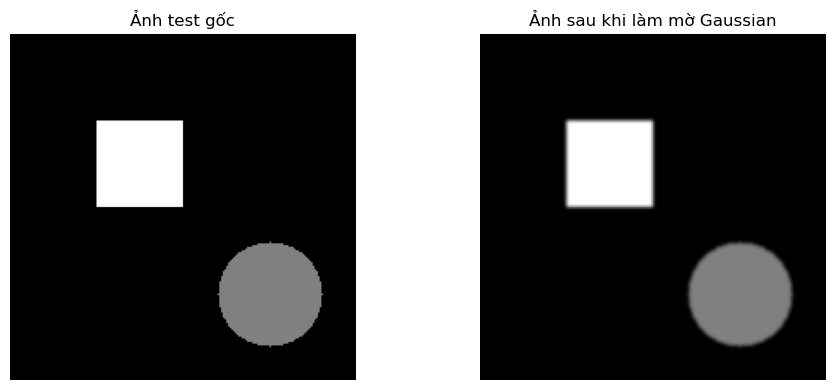

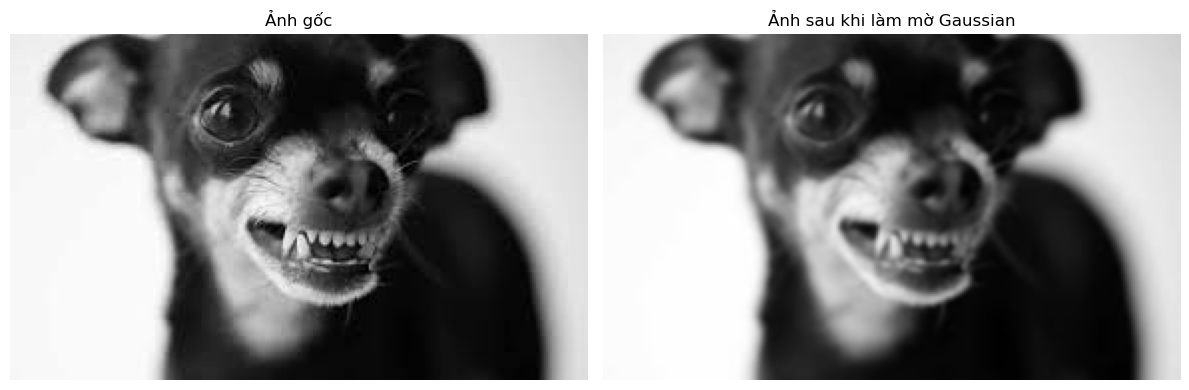

In [4]:
# BÀI TẬP CHƯƠNG 7
# Câu 1:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def apply_gaussian_blur(image_array, kernel):
    """
    Áp dụng bộ lọc Gaussian blur cho ảnh grayscale
    
    Args:
        image_array: Mảng numpy 2D chứa ảnh grayscale
        kernel: Ma trận kernel Gaussian (phải là số lẻ x số lẻ)
    
    Returns:
        Ảnh đã được làm mờ (numpy array)
    """
    # Lấy kích thước ảnh và kernel
    img_h, img_w = image_array.shape
    kernel_h, kernel_w = kernel.shape
    
    # Tính padding để giữ nguyên kích thước ảnh
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    
    # Thêm padding cho ảnh (reflection padding để tránh edge artifacts)
    padded_img = np.pad(image_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    # Khởi tạo ảnh kết quả
    result = np.zeros_like(image_array, dtype=np.float64)
    # Áp dụng convolution
    for i in range(img_h):
        for j in range(img_w):
            # Trích xuất vùng ảnh tương ứng với kernel
            region = padded_img[i:i+kernel_h, j:j+kernel_w]
            # Tính tích chập (convolution)
            result[i, j] = np.sum(region * kernel)
    # Đảm bảo giá trị pixel trong khoảng [0, 255]
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)
def create_gaussian_kernel():
    """
    Tạo ma trận kernel Gaussian 7x7 theo yêu cầu
    Kernel được chuẩn hóa để tổng các phần tử = 1
    """
    kernel = np.array([
        [1,  4,  6,  4,  1],
        [4, 16, 24, 16,  4],
        [6, 24, 36, 24,  6],
        [4, 16, 24, 16,  4],
        [1,  4,  6,  4,  1]
    ], dtype=np.float64)
    # Chuẩn hóa kernel (tổng = 1) để bảo toàn độ sáng
    kernel = kernel / np.sum(kernel)
    return kernel
def process_image(image_path):
    """
    Xử lý ảnh: đọc, chuyển grayscale, áp dụng blur, hiển thị kết quả
    """
    try:
        # Đọc ảnh
        img = Image.open(image_path)
        # Chuyển sang grayscale nếu cần
        if img.mode != 'L':
            img = img.convert('L')
        # Chuyển sang numpy array
        img_array = np.array(img, dtype=np.float64)
        # Tạo Gaussian kernel
        gaussian_kernel = create_gaussian_kernel()
        # Áp dụng Gaussian blur
        blurred_img = apply_gaussian_blur(img_array, gaussian_kernel)
        # Hiển thị kết quả
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title('Ảnh gốc')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(blurred_img, cmap='gray')
        plt.title('Ảnh sau khi làm mờ Gaussian')
        plt.axis('off')   
        plt.tight_layout()
        plt.show()    
        return img_array, blurred_img       
    except Exception as e:
        print(f"Lỗi khi xử lý ảnh: {e}")
        return None, None
# Tạo ảnh mẫu để test (nếu không có ảnh thật)
def create_test_image():
    """
    Tạo ảnh test với các hình dạng đơn giản
    """
    img = np.zeros((200, 200), dtype=np.uint8)
    # Thêm hình chữ nhật
    img[50:100, 50:100] = 255
    # Thêm hình tròn
    center_x, center_y = 150, 150
    radius = 30
    y, x = np.ogrid[:200, :200]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    img[mask] = 128
    return img
if __name__ == "__main__":
    # Tạo kernel Gaussian
    kernel = create_gaussian_kernel()
    print("Gaussian Kernel (5x5):")
    print(kernel)
    print(f"Tổng các phần tử kernel: {np.sum(kernel):.6f}")
    test_img = create_test_image()
    blurred_test = apply_gaussian_blur(test_img, kernel)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(test_img, cmap='gray')
    plt.title('Ảnh test gốc')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(blurred_test, cmap='gray')
    plt.title('Ảnh sau khi làm mờ Gaussian')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    original, blurred = process_image("D:/download.png")